In [ ]:
!pip install qiskit
!pip install qiskit.Aer
!pip install pylatexenc
!pip install qiskit-ibmq-provider
!pip install qiskit-ibm-runtime

In [ ]:
from qiskit import *
from qiskit.quantum_info import Statevector, DensityMatrix, SparsePauliOp
from qiskit.tools.visualization import plot_bloch_multivector, plot_state_qsphere, plot_histogram, array_to_latex
from qiskit import QuantumCircuit, Aer, execute, transpile, QuantumRegister, ClassicalRegister
from numpy import pi

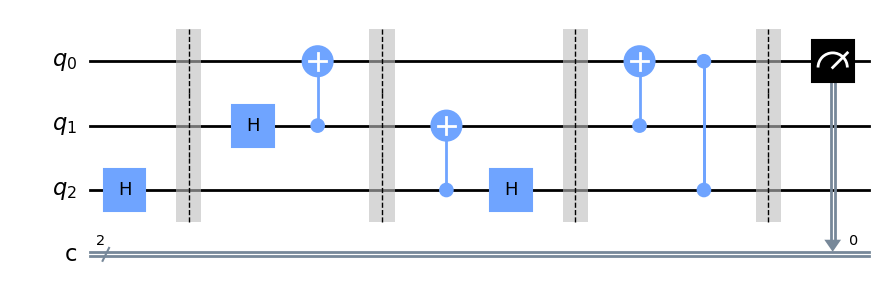

In [ ]:
circuit = QuantumCircuit(3,2)
circuit.h(2)
circuit.barrier()

# create Bell state pair
circuit.h(1)
circuit.cx(1, 0)
circuit.barrier()

# Olivia performs Bell state measurement
circuit.cx(2, 1)
circuit.h(2)
circuit.barrier()

circuit.cx(1,0)
circuit.cz(2,0)

circuit.barrier()

# Barron transforms his qubit based on measurement results
#circuit.x(q0).c_if(crx, 1)  # apply X gate if cr_x is 1
#circuit.z(q0).c_if(crz, 1)  # apply Z gate if cr_z is 1
circuit.measure(0,0)
circuit.draw(output='mpl')

In [ ]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
array_to_latex(statevector, prefix="\\text{statevector = }\n")

<IPython.core.display.Latex object>

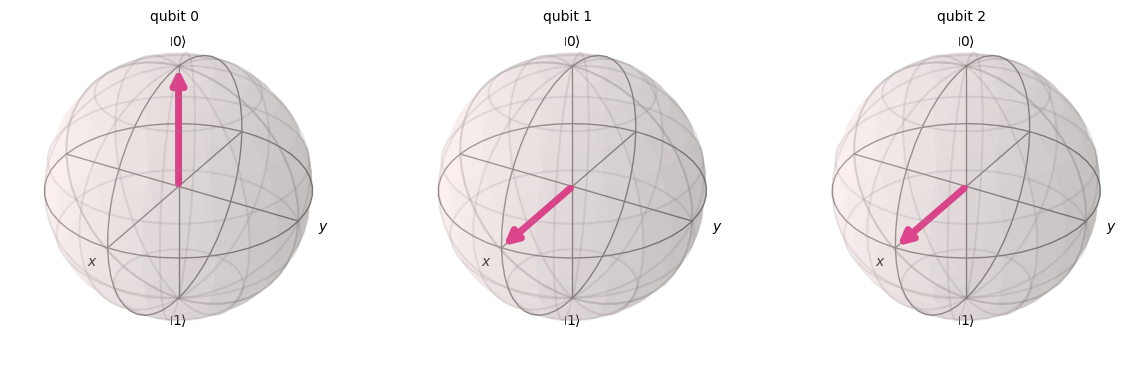

In [ ]:
plot_bloch_multivector(statevector)

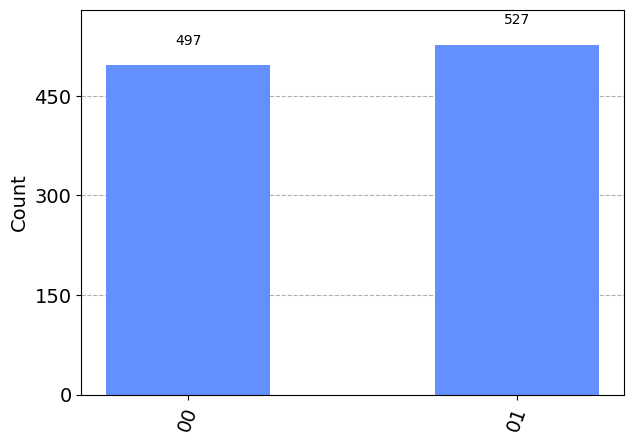

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shot =3).result()
array_to_latex(statevector)

plot_histogram(result.get_counts())

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.tools.monitor import job_monitor
IBMQ.save_account('52f9aa106bb3e350d0590512852bce434004b7954e747140a181de0d1b2cdff6bb7c904bb2a7b4dba49084fa7f2b90eea89080613794e61ca4a7934508ab99a7')
provider = IBMQ.load_account()

configrc.store_credentials:WARNING:2024-01-13 05:48:56,048: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2024-01-13 05:48:56,927: Credentials are already in use. The existing account in the session will be replaced.


In [ ]:
qcomp = provider.get_backend('ibm_brisbane')
job = execute(circuit, backend = qcomp)
job_monitor(job)

Job Status: job is queued (None)

In [ ]:
qcomp_result = job.result()
plot_histogram(qcomp_result.get_counts())